## 1. Problem modeling

In [1]:
using Reachability, MathematicalSystems, Plots

INFO: Recompiling stale cache file /Users/forets/.julia/lib/v0.6/Reachability.ji for module Reachability.


In [7]:
A = [0. 0.5 0. 0. ;
     0. 0. 0. 0. ;
     0. 0. 0. 0.7;
     0. 0. 0. 0.]

# initial set
X0 = BallInf([0., 5., 100., 0], 0.5)

# input set
U = Singleton([0.,0.,0.,-9.81])
U = ConstantInput(U)

# instantiate initial value problem x' = Ax + u with x(0) \in X0
S = ConstrainedLinearControlContinuousSystem(A, eye(A), nothing, U)
prob = InitialValueProblem(S, X0);

## 2. Solution of the reachability problem

In [22]:
options = Options(:mode => "reach",
                  :vars => [1, 2, 3],    # variables to be computed
                  :plot_vars => [1, 3],  # variables to be plotted
                  :δ => 0.08,            # step size
                  :T => 20.0,            # time horizon
                  :verbosity => 1        # use this option to get additional runtime information
                  );

@time result = solve(prob, options);

[info] Time discretization...
[info] elapsed time: 0.000604389 seconds
[info] Reachable States Computation...
[info] - Decomposing X0
[info] elapsed time: 0.000202353 seconds
[info] - Computing successors
[info] elapsed time: 0.028681095 seconds
[info] - Total
[info] elapsed time: 0.030936444 seconds
[info] Projection...
[info] elapsed time: 0.004523557 seconds
  0.373091 seconds (306.81 k allocations: 17.787 MiB)


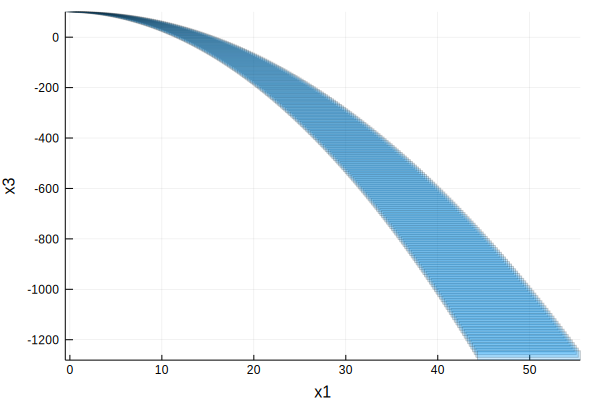

In [18]:
plot(result, alpha=0.2)

## 3. Code profiling

Instruments for code profiling available in Julia's base are explained [in the Profiling section of the refernce manual](https://docs.julialang.org/en/stable/manual/profile/).

In [24]:
@profile solve(prob, options);

[info] Time discretization...
[info] elapsed time: 0.000310432 seconds
[info] Reachable States Computation...
[info] - Decomposing X0
[info] elapsed time: 0.000121407 seconds
[info] - Computing successors
[info] elapsed time: 0.041750318 seconds
[info] - Total
[info] elapsed time: 0.044525368 seconds
[info] Projection...
[info] elapsed time: 0.004518516 seconds


In [25]:
Profile.print()

55 ./task.jl:335; (::IJulia.##14#17)()
 55 ...IJulia/src/eventloop.jl:8; eventloop(::ZMQ.Socket)
  55 .../Compat/src/Compat.jl:385; (::Compat.#inner#17{Array{Any,1},...
   54 ...rc/execute_request.jl:158; execute_request(::ZMQ.Socket, ::...
    54 .../Compat/src/Compat.jl:71; include_string(::Module, ::Strin...
     54 ./loading.jl:522; include_string(::String, ::String)
      54 ./<missing>:?; anonymous
       54 ./profile.jl:23; macro expansion
        1  ...bility/src/solve.jl:100; solve(::MathematicalSystems.I...
         1 ./<missing>:0; (::Reachability.ReachSets.#kw#...
          1 ...hSets/discretize.jl:49; #discretize#1(::String, ::Boo...
        46 ...bility/src/solve.jl:153; solve(::MathematicalSystems.I...
         46 ./<missing>:0; (::Reachability.ReachSets.#kw#...
          45 ...ReachSets/reach.jl:162; #reach#6(::String, ::Float64...
           2  ...ts/reach_blocks.jl:147; reach_blocks!(::Array{Float...
            2 ...s/src/LinearMap.jl:77; *(::Float64, ::LazySets.Inte

Using the profile browser, [ProfileView.jl](https://github.com/timholy/ProfileView.jl) (you may need to install it, with the command `Pkg.add("ProfileView")`).

In [26]:
using ProfileView

[info] Precompiling module ProfileView.
[info] Precompiling module ProfileViewSVG.


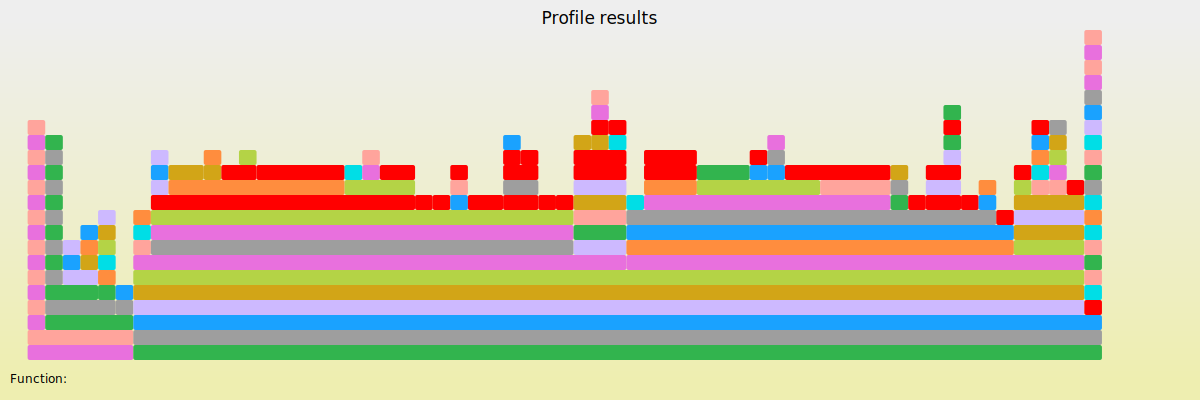

In [27]:
ProfileView.view()